# COVID-19 Dataset Analysis ## 
COVID-19 patient's symptoms, status, and medical history.

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.



The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". Values as 97 and 99 are missing data.

- **sex**: 1 for female and 2 for male.
- **age**: Age of the patient.
- **classification**: COVID test findings. Values 1-3 mean that the patient was diagnosed with COVID in different degrees. 4 or higher means that the patient is not a carrier of COVID or that the test is inconclusive.
- **patient type**: Type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- **pneumonia**: Whether the patient already has air sacs inflammation or not.
- **pregnancy**: Whether the patient is pregnant or not.
- **diabetes**: Whether the patient has diabetes or not.
- **copd**: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- **asthma**: Whether the patient has asthma or not.
- **inmsupr**: Whether the patient is immunosuppressed or not.
- **hypertension**: Whether the patient has hypertension or not.
- **cardiovascular**: Whether the patient has heart or blood vessel-related disease.
- **renal chronic**: Whether the patient has chronic renal disease or not.
- **other disease**: Whether the patient has another disease or not.
- **obesity**: Whether the patient is obese or not.
- **tobacco**: Whether the patient is a tobacco user.
- **usmr**: Indicates whether the patient was treated in medical units of the first, second, or third level.
- **medical unit**: Type of institution of the National Health System that provided the care.
- **intubed**: Whether the patient was connected to the ventilator.
- **icu**: Indicates whether the patient had been admitted to an Intensive Care Unit.
- **date died**: If the patient died, indicates the date of death, and 9999-99-99 otherwise.


#### Importing necessary libraries for the data analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

#### Importing Dataset in the folder

In [2]:
dataframe = pd.read_csv(r'C:\Users\Akshay R\Desktop\Projects\Covid-19_Analysis\Data.csv')

#### Data preview

In [3]:
dataframe.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


## Data underastanding

#### Checking the data types

In [4]:
dataframe.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

- **INSIGHTS** : There is no presence of any wrong or problematic data types

#### Getting information on data

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

- **INSIGHTS** : Information and Data size can be understood here

#### Getting different Stastical data

In [6]:
dataframe.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


- **INSIGHTS** : The statistical data can be understood 

#### Getting Number of rows and column to know the data size

In [7]:
dataframe.shape

(1048575, 21)

- **INSIGHTS** : There are 1048575 rows and 21 columns

#### Checking for missing data

In [8]:
dataframe.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

- **INSIGHTS** : There are no missing data

## Data Pre-processing

#### Removing the death data and converting it to check whether the person is alive or dead

In [9]:
def died(x):
    if x == '9999-99-99':
        return 0
    else:
        return 1


dataframe['DEATH'] = dataframe['DATE_DIED'].apply(died)
dataframe.drop(columns=['DATE_DIED'], inplace=True)

In [10]:
dataframe

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,97,2,2,...,2,2,2,2,2,2,2,7,97,0
1048571,1,13,2,2,2,2,51,97,2,2,...,2,1,2,2,2,2,2,7,2,0
1048572,2,13,2,1,97,2,55,97,2,2,...,2,2,2,2,2,2,2,7,97,0
1048573,2,13,2,1,97,2,28,97,2,2,...,2,2,2,2,2,2,2,7,97,0


#### Handling missing data at 'PREGNANT' section

The missing data at this section is represent by 97 and 98.We handle the missing data that the person is not pregnant since if they are pregnant it must have been recorded

In [11]:
dataframe[dataframe['SEX']==2]['PREGNANT']

1          97
2          97
4          97
11         97
12         97
           ..
1048570    97
1048571    97
1048572    97
1048573    97
1048574    97
Name: PREGNANT, Length: 523511, dtype: int64

In [12]:
#replacing the values
dataframe['PREGNANT'].replace(97,2,inplace=True)
dataframe['PREGNANT'].replace(98,0,inplace=True)
dataframe

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,2,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,2,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,2,1,2,...,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,2,2,2,...,2,2,2,2,2,2,2,7,97,0
1048571,1,13,2,2,2,2,51,2,2,2,...,2,1,2,2,2,2,2,7,2,0
1048572,2,13,2,1,97,2,55,2,2,2,...,2,2,2,2,2,2,2,7,97,0
1048573,2,13,2,1,97,2,28,2,2,2,...,2,2,2,2,2,2,2,7,97,0


#### Handling missing data at 'ICU' section

The missing data at this section is represent by 97 and 98.We handle the missing data that the person is not pregnant since if they are pregnant it must have been recorded

In [13]:
dataframe[dataframe['PATIENT_TYPE']==1]['ICU']

0          97
1          97
3          97
4          97
6          97
           ..
1048568    97
1048570    97
1048572    97
1048573    97
1048574    97
Name: ICU, Length: 848544, dtype: int64

In [14]:
dataframe['ICU'].replace(97,2,inplace=True)
## we can replace all the corresponding values to the ICU section (99) with (0)
dataframe['ICU'].replace(99,0,inplace=True)
dataframe

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,2,1
1,2,1,2,1,97,1,72,2,2,2,...,2,1,2,2,1,1,2,5,2,1
2,2,1,2,2,1,2,55,2,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,2,1
4,2,1,2,1,97,2,68,2,1,2,...,2,1,2,2,2,2,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,2,2,2,...,2,2,2,2,2,2,2,7,2,0
1048571,1,13,2,2,2,2,51,2,2,2,...,2,1,2,2,2,2,2,7,2,0
1048572,2,13,2,1,97,2,55,2,2,2,...,2,2,2,2,2,2,2,7,2,0
1048573,2,13,2,1,97,2,28,2,2,2,...,2,2,2,2,2,2,2,7,2,0


In [15]:
dataframe[dataframe['ICU']==2]['INTUBED']
dataframe['INTUBED'].replace (97, 2, inplace = True)
dataframe

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,2,1,65,2,2,2,...,2,1,2,2,2,2,2,3,2,1
1,2,1,2,1,2,1,72,2,2,2,...,2,1,2,2,1,1,2,5,2,1
2,2,1,2,2,1,2,55,2,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,2,2,53,2,2,2,...,2,2,2,2,2,2,2,7,2,1
4,2,1,2,1,2,2,68,2,1,2,...,2,1,2,2,2,2,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,2,2,40,2,2,2,...,2,2,2,2,2,2,2,7,2,0
1048571,1,13,2,2,2,2,51,2,2,2,...,2,1,2,2,2,2,2,7,2,0
1048572,2,13,2,1,2,2,55,2,2,2,...,2,2,2,2,2,2,2,7,2,0
1048573,2,13,2,1,2,2,28,2,2,2,...,2,2,2,2,2,2,2,7,2,0


# Data Vizualization

Heat maps are used to visualize and display a geographic distribution of data. Heat maps represent different densities of data points on a geographical map to help users see the intensities of certain phenomena and to show items of most or least importance.

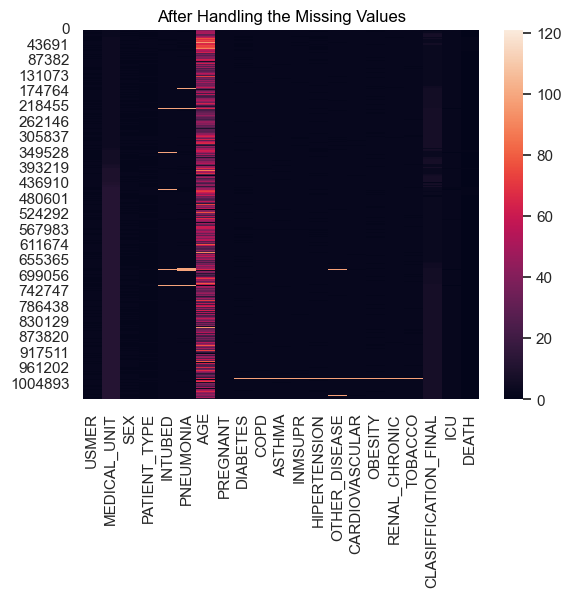

In [16]:
sns.set_theme()
sns.heatmap(data=dataframe)
plt.title('After Handling the Missing Values', color = 'black', fontsize = 12)
plt.show()

- **INSIGHTS** : We can understand the overall density in different section of data

#### Correlation Heatmap

A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix. It's like a color chart 🌈 that shows us how closely related different variables are.

<Axes: >

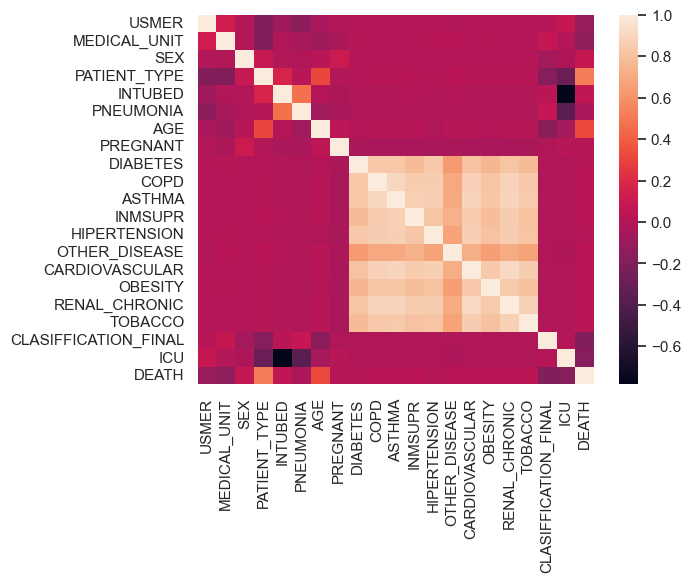

In [17]:
sns.heatmap(dataframe.corr())

-**INSIGHTS** : We can see a thin light shade in the center which looks like a line which gets darker at ends

#### Age Distribution

<Axes: xlabel='AGE', ylabel='Count'>

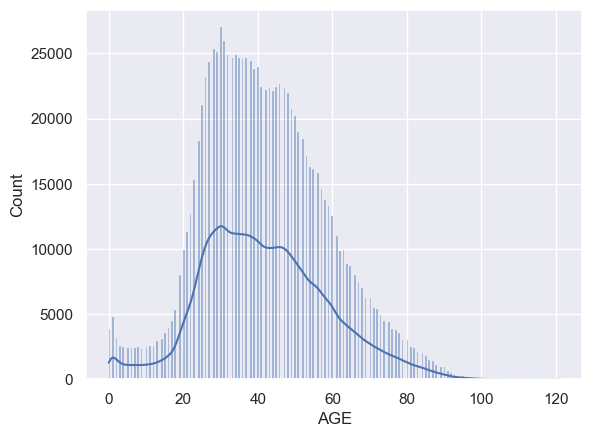

In [18]:
sns.histplot(data=dataframe,x='AGE',kde=True)

-**INSIGHTS** : From the graph we can understand that the people from the age group 25 to 60 are affected by the covid whereas young children and old people are very less affecred by covid 19

#### Sex Distribution

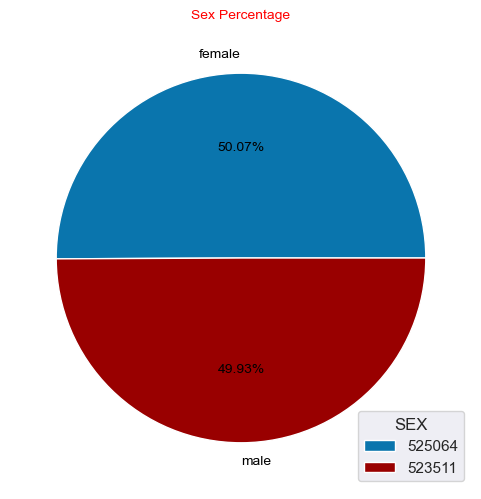

In [19]:
labels=['female','male']
sizes = dataframe['SEX'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (6,6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', textprops={'fontsize':10, 'color':"black"}, colors = colors, startangle=0)
plt.title('Sex Percentage',color = 'red',fontsize = 10)
plt.legend(dataframe['SEX'].value_counts(), loc = 'lower right', title = 'SEX')
plt.show()

-**INSIGHTS** : The amount of male and female are almost in equal ratio

#### Mortality Rate

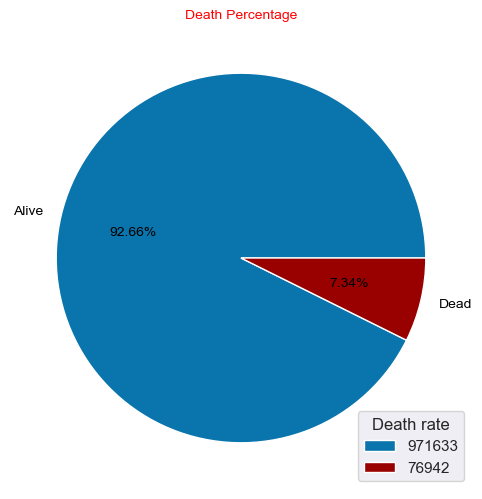

In [20]:
labels=['Alive','Dead']
sizes = dataframe['DEATH'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (6,6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', textprops={'fontsize':10, 'color':"black"}, colors = colors, startangle=0)
plt.title('Death Percentage',color = 'red',fontsize = 10)
plt.legend(dataframe['DEATH'].value_counts(), loc = 'lower right', title = 'Death rate')
plt.show()

-**INSIGHTS** : Death rate is very less almost 7%. This shows that the COVID 19 is not deadly diseas

#### Patient Type : Home, Hospitalization

Text(0.5, 0, 'Patient-type')

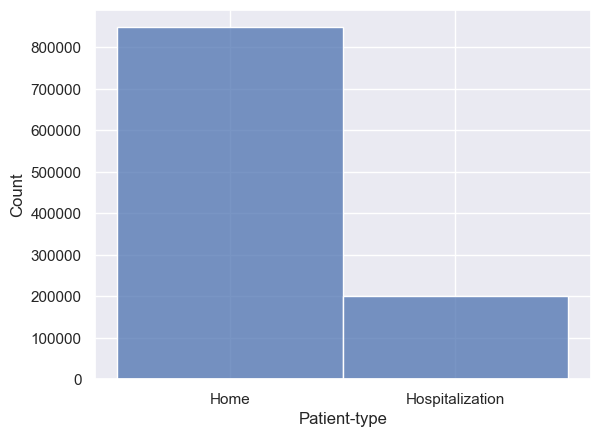

In [21]:
dataframe['PATIENT_TYPE'].replace (1, 'Home', inplace = True)
dataframe['PATIENT_TYPE'].replace (2, 'Hospitalization', inplace = True)
sns.histplot(data=dataframe,x='PATIENT_TYPE',bins=10)
plt.xlabel('Patient-type')

-**INSIGHTS** : No of patients hospitalized are lesser than who got home treatment. This shows the lesser number of availability hospital beds and willingness to get treated at home

#### Age and Mortality distribution

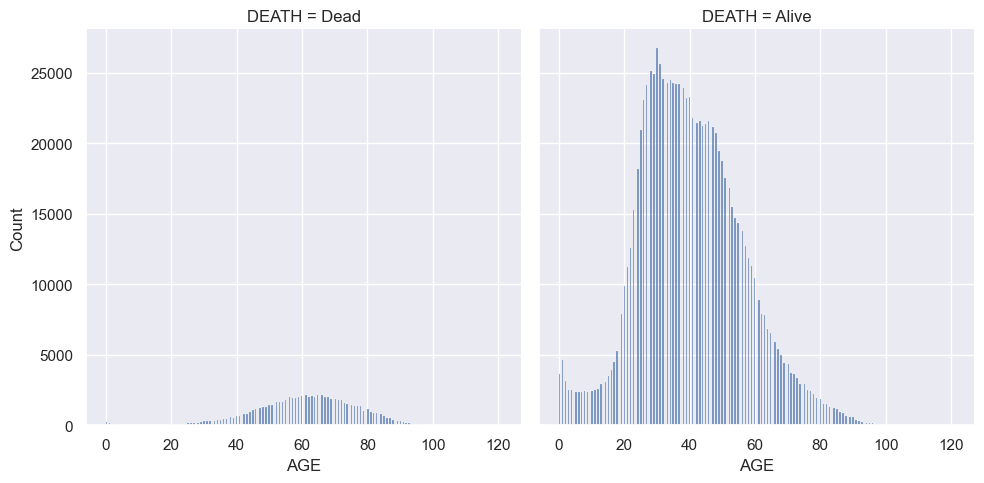

In [22]:
dataframe['DEATH'].replace (0, 'Alive', inplace = True)
dataframe['DEATH'].replace (1, 'Dead', inplace = True)
sns.displot(data=dataframe, x='AGE', col='DEATH')

-**INSIGHTS** : People of the age grp from 50 to 60 had high mortality.People belonging to the age grp 20 to 60 were able to recover from the COVID 19

#### Relation between the moratality rate between home treated and hospitalized patient

<Axes: xlabel='PATIENT_TYPE', ylabel='count'>

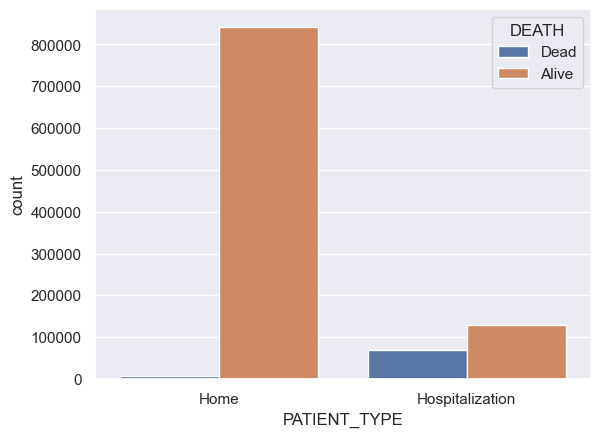

In [23]:
sns.countplot(data=dataframe, x='PATIENT_TYPE', hue='DEATH')

#### Relation between diabetes and hypertension patients

<Axes: xlabel='DIABETES', ylabel='HIPERTENSION'>

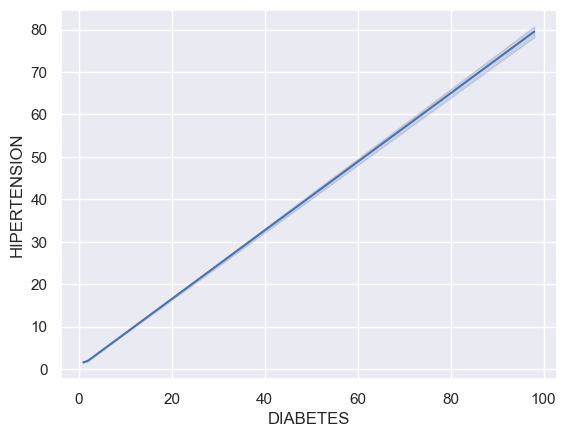

In [24]:
sns.lineplot(data=dataframe,x='DIABETES',y='HIPERTENSION')

- **INSIGHTS** : patients with diabeties are more likely to have to hypertension 

#### Relation between Diabeties and obese patients

<Axes: xlabel='DIABETES', ylabel='OBESITY'>

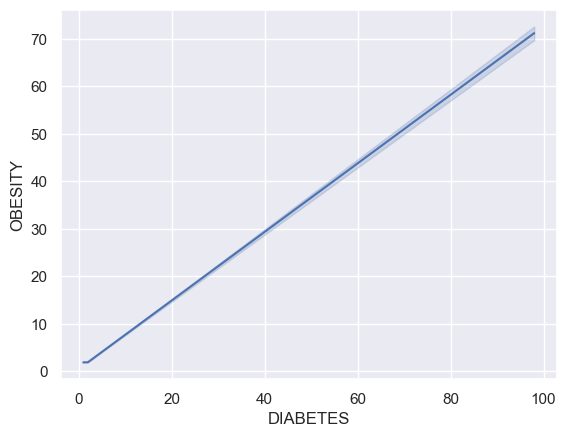

In [25]:
sns.lineplot(data=dataframe,x='DIABETES',y='OBESITY')

-**INSIGHTS** : The plot shows that the the obese people are more likely to have diabeties

#### Relation between hypertension and obesity

<Axes: xlabel='HIPERTENSION', ylabel='OBESITY'>

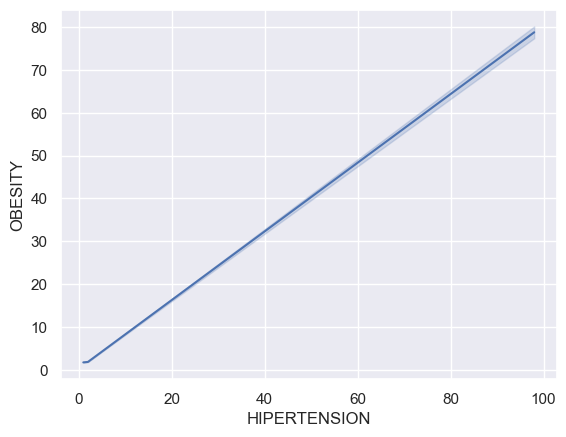

In [26]:
sns.lineplot(data=dataframe,x='HIPERTENSION',y='OBESITY')

- **INSIGHTS** : The plot shows that the the obese people are more likely to have hypertension

#### Relation between Sex and Mortality

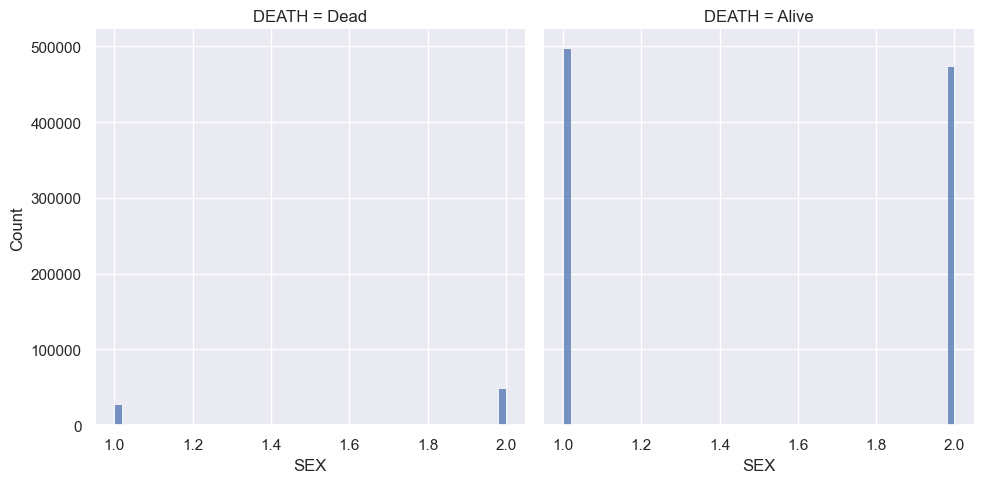

In [27]:
sns.displot(data=dataframe, x='SEX', col='DEATH')

-**INSIGHTS** : The plot shows that the males had high mortality than females

#### Relation between ventilators used age wise

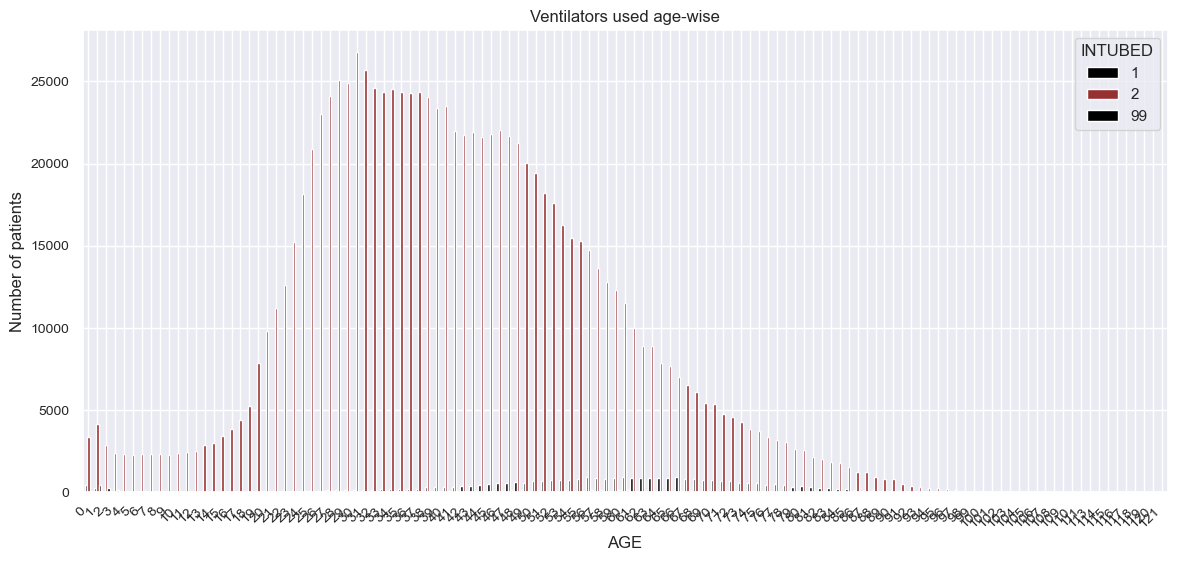

In [28]:
# Group by 'INTUBED' and count the occurrences of each 'AGE'
age_counts = dataframe.groupby('INTUBED')['AGE'].value_counts().unstack(0)

# Plotting the bar chart with customizations
ax = age_counts.plot.bar(
    ylabel='Number of patients', 
    title='Ventilators used age-wise', 
    figsize=(14, 6), 
    fontsize=5, # increase font size for readability
    width=0.8,  # make bars thicker
    color=['#000', '#973131'] # bright colors for the bars
)

# Customizing the plot further if needed
plt.xticks(rotation=45, ha='right', fontsize=10) # rotate x-axis labels for better readability
plt.yticks(fontsize=10) # adjust y-axis font size

# Show the plot
plt.show()

-**INSIGHTS** : people of age group of 20 to 60 are in ventilator which coincide with the age group of most cases and had lesser mortality

## Conclusion


This comprehensive dataset provided by the Mexican government includes detailed anonymized information about 1,048,576 unique COVID-19 patients. With 21 unique features, it captures a wide range of patient data, including demographics, pre-existing conditions, and outcomes. This dataset is crucial for developing a machine learning model to predict high-risk COVID-19 patients based on their symptoms, status, and medical history. Accurate predictions can assist healthcare providers in efficiently allocating medical resources, thereby potentially saving lives during the pandemic. The richness and granularity of this dataset offer a robust foundation for insightful analysis and effective model building.
